## Web Scraping

In this section the Wikipedia page [List of foreign Premier League players](https://en.wikipedia.org/wiki/List_of_foreign_Premier_League_players) will be scraped to create a CSV file.

The target data is formatted as follows:

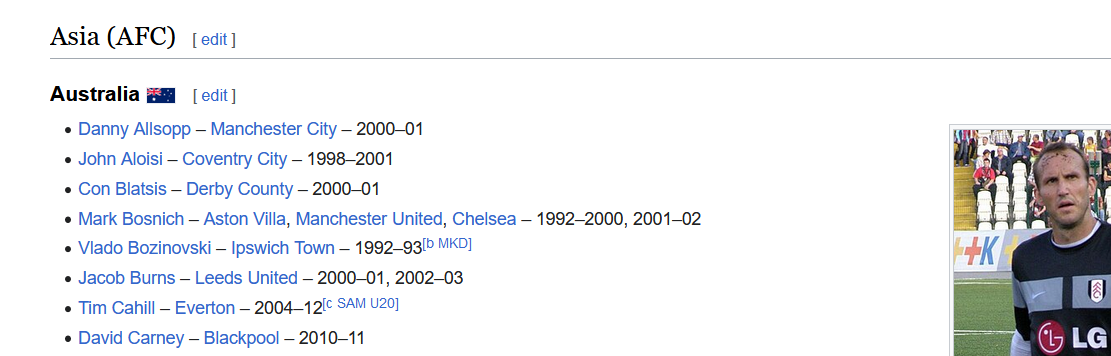
- Continent (Association)  
  - Country  
    - Player name - Premier League club(s) - years at the Premier League

The list doesn't specify the club the player played in a certain year or period.

In [113]:
## Install required libraries
# !pip install -r requirements.txt

In [114]:
import requests

# download HTML content
page = requests.get("https://en.wikipedia.org/wiki/List_of_foreign_Premier_League_players")
print(page.status_code) # 200 means OK
print(page.content) #scarped data

200
b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of foreign Premier League players - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-featu

In [134]:
# save the page content for later use
with open('html.txt', 'w') as file:
    file.write(page.text)

## Data Parsing

In [115]:
# Use Beautiful Soup and pretty print
from bs4 import BeautifulSoup as bs

# parse the downloaded HTML file
soup = bs(page.content, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of foreign Premier League players - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clie

In [147]:
# identify where target data starts in the HTML page
start = soup.find(id="Africa_.28CAF.29")
soup_parent = start.parent
soup_parent

<h2><span id="Africa_.28CAF.29"></span><span class="mw-headline" id="Africa_(CAF)">Africa (CAF)</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_foreign_Premier_League_players&amp;action=edit&amp;section=1" title="Edit section: Africa (CAF)"><span>edit</span></a><span class="mw-editsection-bracket">]</span></span></h2>

In [148]:
# extract the relevant portion of the HTML file that contains the target data
tags = [soup_parent]
for tag in soup_parent.next_siblings:
    if tag.name == "div":
    # if tag.text == "Notes":
        break
    else:
        tags.append(tag)      

In [149]:
tags

[<h2><span id="Africa_.28CAF.29"></span><span class="mw-headline" id="Africa_(CAF)">Africa (CAF)</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_foreign_Premier_League_players&amp;action=edit&amp;section=1" title="Edit section: Africa (CAF)"><span>edit</span></a><span class="mw-editsection-bracket">]</span></span></h2>,
 '\n',
 <h3><span class="mw-headline" id="Algeria">Algeria <span class="flagicon"><span class="mw-image-border" typeof="mw:File"><a href="/wiki/Algeria" title="Algeria"><img alt="Algeria" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/23px-Flag_of_Algeria.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/35px-Flag_of_Algeria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/45px-Flag_of_Algeria.svg.png 2

In [150]:
tags[-2]

'\n'

In [151]:
# remove all the bold text 
for match in soup.find_all('b'):
    match.replaceWithChildren()

# remove newline characters from the list
tags = [item for item in tags if item != "\n"]
# remove figures from the list
tags = [tag for tag in tags if tag.name != "figure"]

locate the data to extract for the table

In [152]:
tags[0].text

'Africa (CAF)[edit]'

In [153]:
print(tags[0])
tags[0]

<h2><span id="Africa_.28CAF.29"></span><span class="mw-headline" id="Africa_(CAF)">Africa (CAF)</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_foreign_Premier_League_players&amp;action=edit&amp;section=1" title="Edit section: Africa (CAF)"><span>edit</span></a><span class="mw-editsection-bracket">]</span></span></h2>


<h2><span id="Africa_.28CAF.29"></span><span class="mw-headline" id="Africa_(CAF)">Africa (CAF)</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_foreign_Premier_League_players&amp;action=edit&amp;section=1" title="Edit section: Africa (CAF)"><span>edit</span></a><span class="mw-editsection-bracket">]</span></span></h2>

In [154]:
tags[1].text

'Algeria [edit]'

In [155]:
print(tags[1])
tags[1].text.split('[')[0].strip()

<h3><span class="mw-headline" id="Algeria">Algeria <span class="flagicon"><span class="mw-image-border" typeof="mw:File"><a href="/wiki/Algeria" title="Algeria"><img alt="Algeria" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/23px-Flag_of_Algeria.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/35px-Flag_of_Algeria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/45px-Flag_of_Algeria.svg.png 2x" width="23"/></a></span></span></span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_foreign_Premier_League_players&amp;action=edit&amp;section=2" title="Edit section: Algeria"><span>edit</span></a><span class="mw-editsection-bracket">]</span></span></h3>


'Algeria'

In [156]:
import re

for player in tags[2]:
    try:
        player_info = player.contents
        info_list = [info.get("title") for info in player_info if info.name == 'a']
        years = []
        for info in player_info:
            if re.findall(r"\d+–\d+", str(info)):
                year = re.findall(r"\d+–\d+", str(info))
                years += year
    
    except:
        pass
    
print(info_list + years)

['Hassan Yebda', 'Portsmouth F.C.', '2009–10']


## Create Tablular Dataset

In [160]:
rows = []
count = 0
region = []
association = []
country = []
info_list = []
years = []
for tag in tags:
    if tag.name == "h2" and not tag.text.startswith("Notes"):
        region = tag.text.split('[')[0].strip()
        region = region.replace('(','').replace(')','')
        continent = [region.rsplit(' ', 1)[0]]
        association = [region.rsplit(' ', 1)[1]]

    elif tag.name == "h3":
        country = [tag.text.split('[')[0].strip()]

    elif tag.name == 'ul':
        for player in tag:
            try:
                count += 1
                player_info = player.contents
                #player name and clubs
                info_list = [info.get("title") for info in player_info if info.name == 'a']
                # print(info_list[0])
                years = []
                for info in player_info:
                    if re.findall(r"\d+–", str(info)):
                        year = re.findall(r"\d+–\d*", str(info))
                        years += year
                    row = continent + association + country + [info_list[0].split(" (")[0]] + [info_list[1:]] + [years]
                info_list = None
                years = None
                print(row)
                rows.append(row)
            except:
                pass

    # print(continent, tag.name, country)
    

['Africa', 'CAF', 'Algeria', 'Mehdi Abeid', ['Newcastle United F.C.'], ['2014–15']]
['Africa', 'CAF', 'Algeria', 'Rayan Aït-Nouri', ['Wolverhampton Wanderers F.C.'], ['2020–']]
['Africa', 'CAF', 'Algeria', 'Nadir Belhadj', ['Portsmouth F.C.'], ['2008–10']]
['Africa', 'CAF', 'Algeria', 'Djamel Belmadi', ['Manchester City F.C.'], ['2002–03']]
['Africa', 'CAF', 'Algeria', 'Ali Benarbia', ['Manchester City F.C.'], ['2002–03']]
['Africa', 'CAF', 'Algeria', 'Saïd Benrahma', ['West Ham United F.C.'], ['2020–24']]
['Africa', 'CAF', 'Algeria', 'Nabil Bentaleb', ['Tottenham Hotspur F.C.', 'Newcastle United F.C.'], ['2013–16', '2019–20']]
['Africa', 'CAF', 'Algeria', 'Hamer Bouazza', ['Watford F.C.', 'Fulham F.C.'], ['2006–08']]
['Africa', 'CAF', 'Algeria', 'Madjid Bougherra', ['Charlton Athletic F.C.'], ['2006–07']]
['Africa', 'CAF', 'Algeria', 'Sofiane Feghouli', ['West Ham United F.C.'], ['2016–17']]
['Africa', 'CAF', 'Algeria', 'Rachid Ghezzal', ['Leicester City F.C.'], ['2018–19']]
['Africa'

In [161]:
import pandas as pd

column_names = ["Region", "Association", "Country", "Player", "Clubs", "Periods"]
df = pd.DataFrame(rows, columns=column_names)
nClubs = [len(item) for item in df["Clubs"]]
# add a missing value (due to formatting inconsistency)
df["Periods"][2640] = ['2018–23'] # for Yerry Mina
nYears = df["Periods"]
df["Clubs"] = [', '.join(item) for item in df["Clubs"]]
df["Periods"] = [', '.join(item) for item in df["Periods"]]
df

C:\Users\USER\AppData\Local\Temp\ipykernel_1424\2680576099.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Periods"][2640] = ['2018–23'] # for Yerry Mina


,Region,Association,Country,Player,Clubs,Periods
0,Africa,CAF,Algeria,Mehdi Abeid,Newcastle United F.C.,2014–15
1,Africa,CAF,Algeria,Rayan Aït-Nouri,Wolverhampton Wanderers F.C.,2020–
2,Africa,CAF,Algeria,Nadir Belhadj,Portsmouth F.C.,2008–10
3,Africa,CAF,Algeria,Djamel Belmadi,Manchester City F.C.,2002–03
4,Africa,CAF,Algeria,Ali Benarbia,Manchester City F.C.,2002–03
...,...,...,...,...,...,...
2704,South America,CONMEBOL,Uruguay,Lucas Torreira,Arsenal F.C.,2018–20
2705,South America,CONMEBOL,Uruguay,Guillermo Varela,Manchester United F.C.,2015–16
2706,South America,CONMEBOL,Uruguay,Matías Viña,AFC Bournemouth,2022–23
2707,South America,CONMEBOL,Venezuela,Fernando Amorebieta,Fulham F.C.,2013–14


In [162]:
df["Number of Clubs"] = nClubs
df

,Region,Association,Country,Player,Clubs,Periods,Number of Clubs
0,Africa,CAF,Algeria,Mehdi Abeid,Newcastle United F.C.,2014–15,1
1,Africa,CAF,Algeria,Rayan Aït-Nouri,Wolverhampton Wanderers F.C.,2020–,1
2,Africa,CAF,Algeria,Nadir Belhadj,Portsmouth F.C.,2008–10,1
3,Africa,CAF,Algeria,Djamel Belmadi,Manchester City F.C.,2002–03,1
4,Africa,CAF,Algeria,Ali Benarbia,Manchester City F.C.,2002–03,1
...,...,...,...,...,...,...,...
2704,South America,CONMEBOL,Uruguay,Lucas Torreira,Arsenal F.C.,2018–20,1
2705,South America,CONMEBOL,Uruguay,Guillermo Varela,Manchester United F.C.,2015–16,1
2706,South America,CONMEBOL,Uruguay,Matías Viña,AFC Bournemouth,2022–23,1
2707,South America,CONMEBOL,Venezuela,Fernando Amorebieta,Fulham F.C.,2013–14,1


In [163]:
start_list = []
end_list = []
sums = []
countt = 0

for row in nYears:
    start_list.append(int(row[0].split('–')[0]))
    end = row[-1].rsplit('–', 1)[1]
    if len(end) == 2 and int(end) < 90 and int(end) != 2000:
        end = '20' + end
    elif len(end) == 2 and int(end) > 90  and int(end) != 2000:
        end = "19" + end    
    end_list.append(end)

    years = 0
    for period in row:
        start, end = period.split('–')
        if len(end) == 2 and int(end) < 90 and int(end) != 2000:
            end = '20' + end
        elif len(end) == 2 and int(end) > 90 and int(end) != 2000:
            end = "19" + end
        elif end=='':
            end = '2024'
        years += int(end) - int(start)

    sums.append(years)

df["First Year"] = start_list
df["Final Year"] = end_list
df["Total Years"] = sums

active = [True if not year else False for year in df["Final Year"] ]
df["Active"] = active #as of March 2024
df

    

,Region,Association,Country,Player,Clubs,Periods,Number of Clubs,First Year,Final Year,Total Years,Active
0,Africa,CAF,Algeria,Mehdi Abeid,Newcastle United F.C.,2014–15,1,2014,2015,1,False
1,Africa,CAF,Algeria,Rayan Aït-Nouri,Wolverhampton Wanderers F.C.,2020–,1,2020,,4,True
2,Africa,CAF,Algeria,Nadir Belhadj,Portsmouth F.C.,2008–10,1,2008,2010,2,False
3,Africa,CAF,Algeria,Djamel Belmadi,Manchester City F.C.,2002–03,1,2002,2003,1,False
4,Africa,CAF,Algeria,Ali Benarbia,Manchester City F.C.,2002–03,1,2002,2003,1,False
...,...,...,...,...,...,...,...,...,...,...,...
2704,South America,CONMEBOL,Uruguay,Lucas Torreira,Arsenal F.C.,2018–20,1,2018,2020,2,False
2705,South America,CONMEBOL,Uruguay,Guillermo Varela,Manchester United F.C.,2015–16,1,2015,2016,1,False
2706,South America,CONMEBOL,Uruguay,Matías Viña,AFC Bournemouth,2022–23,1,2022,2023,1,False
2707,South America,CONMEBOL,Venezuela,Fernando Amorebieta,Fulham F.C.,2013–14,1,2013,2014,1,False


In [132]:
# data types in the dataset
df.dtypes

Region             object
Association        object
Country            object
Player             object
Clubs              object
Periods            object
Number of Clubs     int64
First Year          int64
Final Year         object
Total Years         int64
Active               bool
dtype: object

In [164]:
# save dataset as a csv fil
df.to_csv("dataset.csv")